#Data 620-Assignment04: Assignment Data Sets

Group member: Mahmud Hasan Al Raji and Warner Alexis


#Introduction

This assignment is about to analyze the Davis Southern Women two-mode network dataset. The dataset represents a bipartite (two-mode) network, where one set of nodes represents women (18 nodes).The other set represents social events (14 nodes).
An edge (tie) here connects a woman to an event if she attended it.

By using the dataset, we will create and visualize the two-mode network, and analyze relationships between the women based on shared events, and the social events based on shared attendees. Then we will draw inferences about group structures and interaction patterns.

#Import required libraries

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from networkx.algorithms import bipartite, community


#Load the Davis Southern Women dataset

In [24]:
## NetworkX already includes a function to load this dataset.
# Load the dataset
G = nx.davis_southern_women_graph()

# Print basic info
print(G)


Graph with 32 nodes and 89 edges


The graph cretaed here represents a bipartite graph with 32 nodes, 18 nodes for women plus 14 nodes for events. Each edge here connects a woman to an event she attended.

#Check node sets

In [25]:
# Separate women and events using the 'bipartite' node attribute
women = {n for n, d in G.nodes(data=True) if d['bipartite'] == 0}
events = set(G) - women

print("Women:", len(women))
print("Events:", len(events))


Women: 18
Events: 14


#Visualize the two-mode network

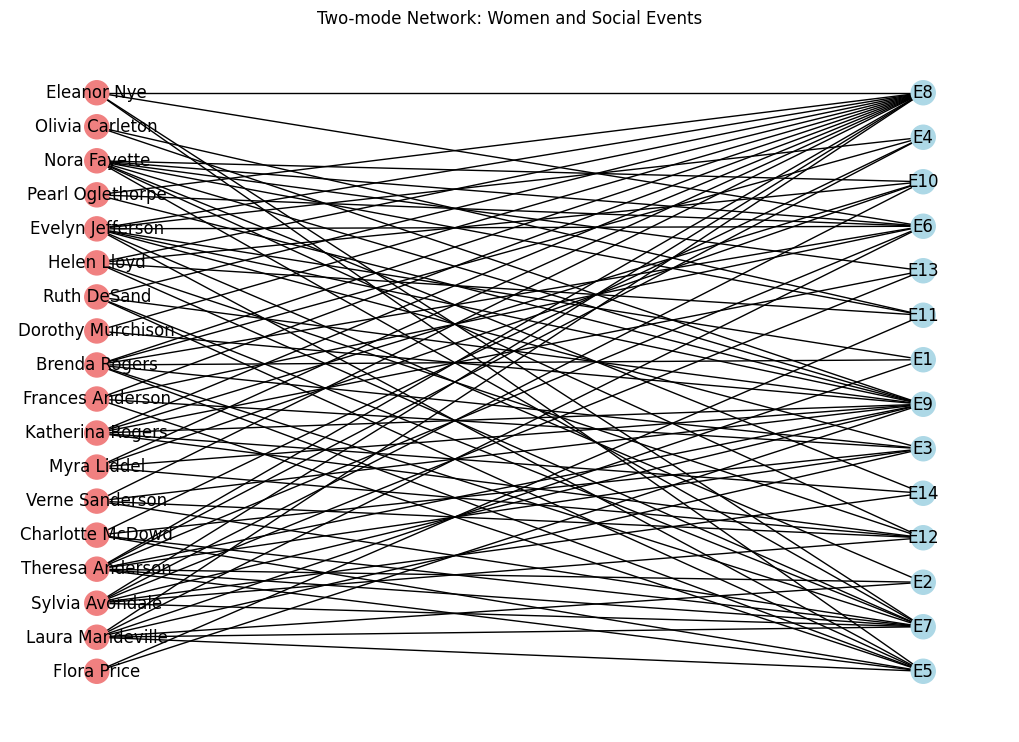

In [26]:
# Draw bipartite network
plt.figure(figsize=(10, 7))
pos = nx.bipartite_layout(G, women)
nx.draw(G, pos, with_labels=True, node_color=["lightcoral" if n in women else "lightblue" for n in G.nodes()])
plt.title("Two-mode Network: Women and Social Events")
plt.show()


In this visualization, red nodes represent women, and blue nodes represent social events. The edges represent attendance relationships. This visualization shows how certain women attended many events and how events linked groups of women together.

#Project the network: women–women and event–event

To analyze relationships among women and among events, we project the two-mode network into two one-mode networks.

In [27]:
# Project the network onto women
women_proj = bipartite.weighted_projected_graph(G, women)

# Project the network onto events
event_proj = bipartite.weighted_projected_graph(G, events)


In the women projection, two women are connected if they attended the same event.The edge weight represents how many events they both attended.Similarly, in the event projection, two events are connected if they share attendees.

#Visualize women–women network

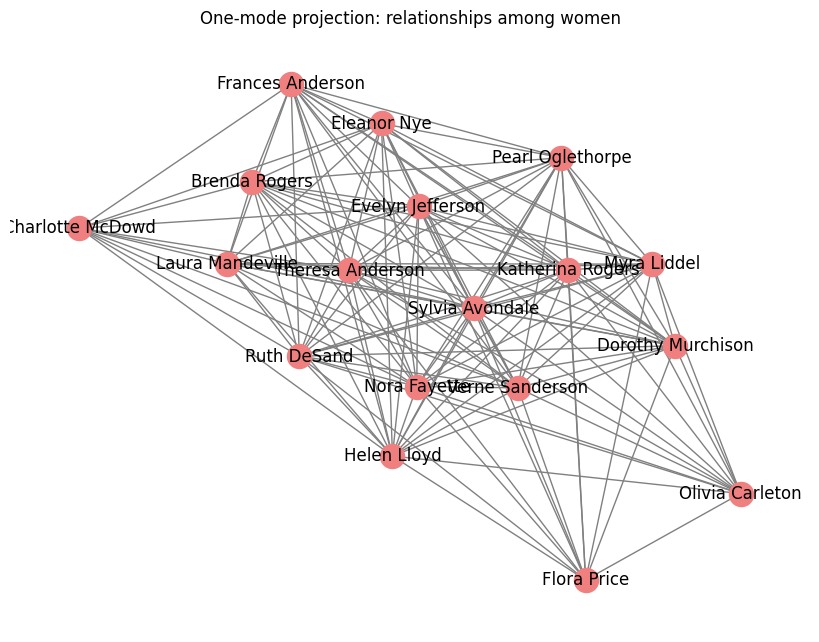

In [28]:
plt.figure(figsize=(8, 6))
nx.draw(women_proj, with_labels=True, node_color="lightcoral", edge_color="gray")
plt.title("One-mode projection: relationships among women")
plt.show()


In this visualiztion, the clusters of women who attended many common events will be tightly connected. This helps identify social groups or communities among the women.

#Visualize event–event network

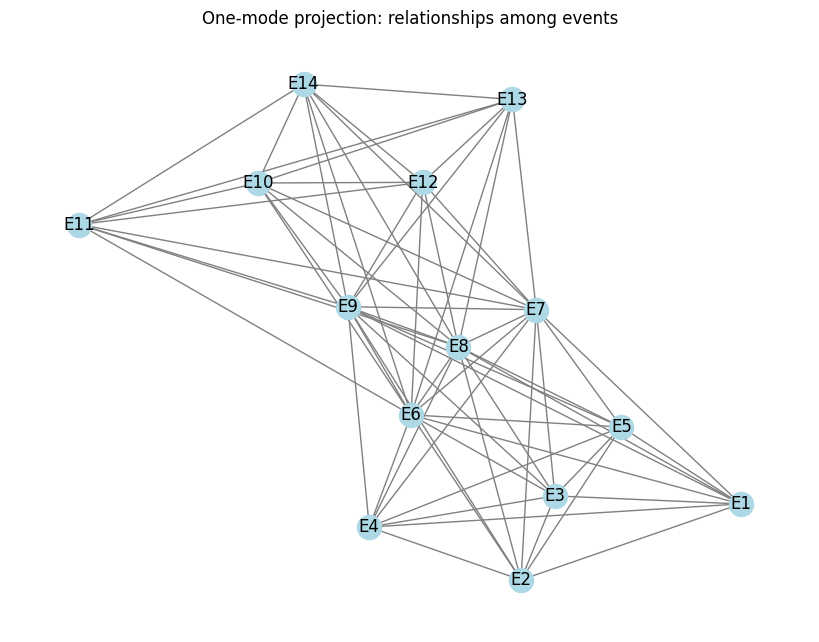

In [29]:
plt.figure(figsize=(8, 6))
nx.draw(event_proj, with_labels=True, node_color="lightblue", edge_color="gray")
plt.title("One-mode projection: relationships among events")
plt.show()


In this visualization, the events that share many of the same attendees are linked. These links reveal which events attracted similar groups of women.

#Network analysis

#1.Women-women network:

#1.1.Degree centrality (women)

In [30]:
deg_centrality_women = nx.degree_centrality(women_proj)
top_women = sorted(deg_centrality_women.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 women by edgree centrality:")
for w, c in top_women:
    print(f"{w}: {c:.3f}")


Top 5 women by edgree centrality:
Ruth DeSand: 1.000
Helen Lloyd: 1.000
Evelyn Jefferson: 1.000
Sylvia Avondale: 1.000
Verne Sanderson: 1.000


 The top five women: Ruth DeSand, Helen Lloyd, Evelyn Jefferson, Sylvia Avondale, and Verne Sanderson have the highest degree centrality (1.0), meaning each of them is directly connected to all other women in the projected network. This indicates that they attended events with almost every other participant. It also suggests they were very socially active and well-connected individuals within the group.

#1.2.Community detection (women)

In [31]:
#Community detection (clusters)
greedy_comms = list(community.greedy_modularity_communities(women_proj))
clusters_names = [sorted(list(c)) for c in greedy_comms]

print("Clusters of women (communities):")
for i, c in enumerate(clusters_names, 1):
    print(f" Cluster {i}: {c}")

Clusters of women (communities):
 Cluster 1: ['Dorothy Murchison', 'Evelyn Jefferson', 'Flora Price', 'Helen Lloyd', 'Katherina Rogers', 'Myra Liddel', 'Nora Fayette', 'Olivia Carleton', 'Pearl Oglethorpe', 'Ruth DeSand', 'Sylvia Avondale', 'Theresa Anderson']
 Cluster 2: ['Brenda Rogers', 'Charlotte McDowd', 'Eleanor Nye', 'Frances Anderson', 'Laura Mandeville', 'Verne Sanderson']


The women are divided into two clusters. Cluster 1 has Dorothy Murchison, Evelyn Jefferson, Flora Price, Helen Lloyd, Katherina Rogers, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, and Theresa Anderson. Cluster 2 has Brenda Rogers, Charlotte McDowd, Eleanor Nye, Frances Anderson, Laura Mandeville, and Verne Sanderson. Women in the same cluster are connected because they attended many of the same events.

#1.3.Identify bridges (betweenness centrality-women)

In [32]:
#Identify bridges (betweenness centrality)
bet_cent = nx.betweenness_centrality(women_proj)
# set threshold (top 20% of betweenness values)
threshold = sorted(bet_cent.values(), reverse=True)[int(0.2*len(bet_cent))]
bridges = [n for n, b in bet_cent.items() if b >= threshold]

print("\nWomen acting as bridges between clusters:")
print(bridges)


Women acting as bridges between clusters:
['Ruth DeSand', 'Helen Lloyd', 'Evelyn Jefferson', 'Sylvia Avondale', 'Verne Sanderson', 'Nora Fayette', 'Theresa Anderson']


Women acting as bridges between clusters include: Ruth DeSand, Helen Lloyd, Evelyn Jefferson, Sylvia Avondale, Verne Sanderson, Nora Fayette, Theresa Anderson.

#2.Event-event network


#2.1 Degree centrality (events):

In [33]:
deg_centrality_events = nx.degree_centrality(event_proj)
top_events = sorted(deg_centrality_events.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 events by degree ecntrality:")
for e, c in top_events:
    print(f"{e}: {c:.3f}")


Top 5 events by degree ecntrality:
E7: 1.000
E9: 1.000
E6: 1.000
E8: 1.000
E5: 0.615


The top five events: E6, E,7 E8, E9, and E5 have the highest degree centrality values. The first four events each have a centrality of 1.0, meaning they were attended by almost all women in the dataset. This suggests that these events were very popular and served as major gathering points in the social network. Event E5, with a centrality of 0.615, was somewhat less central but still connected to a large number of women.

#2.2 Community detection (clusters of events)

In [34]:
#Community detection
greedy_comms_events = list(community.greedy_modularity_communities(event_proj))
clusters_events = [sorted(list(c)) for c in greedy_comms_events]

print("Clusters of events (communities):")
for i, c in enumerate(clusters_events, 1):
    print(f" Cluster {i}: {c}")

Clusters of events (communities):
 Cluster 1: ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7']
 Cluster 2: ['E10', 'E11', 'E12', 'E13', 'E14', 'E8', 'E9']


The events are divided into two clusters. Cluster 1 includes E1, E2, E3, E4, E5, E6, and E7. Cluster 2 includes E8, E9, E10, E11, E12, E13, and E14. Women often attended events within the same cluster. Events in the same cluster are connected because many women went to them together

#2.3 Identify bridging events (betweenness centrality)

In [35]:
# Identify bridging events
bet_cent_events = nx.betweenness_centrality(event_proj)
# Threshold: top 20% of betweenness values
threshold_events = sorted(bet_cent_events.values(), reverse=True)[int(0.2*len(bet_cent_events))]
bridging_events = [n for n, b in bet_cent_events.items() if b >= threshold_events]

print("\nEvents acting as bridges between clusters:")
print(bridging_events)


Events acting as bridges between clusters:
['E7', 'E9', 'E6', 'E8']


Some events act as bridges between the two clusters. These events are E6, E7, E8, and E9. Women who attended these events also went to events in both clusters.

#Inference summary

**Women–women network:

The women–women network shows distinct clusters where women attending many common events are tightly connected.

Cluster 1 includes: Dorothy Murchison, Evelyn Jefferson, Flora Price, Helen Lloyd, Katherina Rogers, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson.

Cluster 2 includes: Brenda Rogers, Charlotte McDowd, Eleanor Nye, Frances Anderson, Laura Mandeville, Verne Sanderson.

The most socially active women, based on degree centrality, are Ruth DeSand, Helen Lloyd, Evelyn Jefferson, Sylvia Avondale, and Verne Sanderson. Several women, including Ruth DeSand, Helen Lloyd, Evelyn Jefferson, Sylvia Avondale, Verne Sanderson, Nora Fayette, and Theresa Anderson, act as bridges between clusters, connecting different subgroups.

Overall, the women-women network highlights social subgroups, key connectors, and interaction patterns among the women, showing how events shaped social cohesion and relationships within the group.

**Event-event network:

The event–event network shows clusters of events that were attended by many common women, forming distinct communities.

Cluster 1 includes events: E1, E2, E3, E4, E5, E6, E7. Cluster 2 includes events: E10, E11, E12, E13, E14, E8, E9.

The most attended events, based on degree centrality, are E6, E7, E8, E9, and E5. Several events, including E6, E7, E8, and E9, act as bridges between clusters, connecting different communities of events and facilitating interaction among various social subgroups of women.

Overall, the network highlights which events were central, popular, and important in linking social groups, providing insights into the structure of social gatherings and event participation patterns.


#Conclusion

The analysis of the women–women and event–event networks shows how social interactions and event attendance are connected. The women–women network identifies social groups, the most active women, and those who connect different groups. The event–event network shows which events were most popular and which events link different groups of women.

Overall, these networks show how participation in events shapes social connections, highlights key people and events, and reveals the structure of social communities.
